## Project Title:
---------------------
Covid 19 Detection using X-Ray Images by implementing effective deep learning technique.
### Problem Statement : 
--------------------------------
Detect to find if the patient has been diagnosed with COVID or not using X-Ray Images by implementing out effective deep learning techniques to the dataset.
### DataSet:
---------------
https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database



###  COVID-19 CHEST X-RAY DATABASE
----------------------------------------------
A team of researchers from Qatar University, Doha, Qatar, and the University of Dhaka, Bangladesh along with their collaborators from Pakistan and Malaysia in collaboration with medical doctors have created a database of chest X-ray images for COVID-19 positive cases along with Normal and Viral Pneumonia images. This COVID-19, normal and other lung infection dataset is released in stages. In the first release we have released 219 COVID-19, 1341 normal and 1345 viral pneumonia chest X-ray (CXR) images. In the first update, we have increased the COVID-19 class to 1200 CXR images. In the 2nd update, we have increased the database to 3616 COVID-19 positive cases along with 10,192 Normal, 6012 Lung Opacity (Non-COVID lung infection) and 1345 Viral Pneumonia images and corresponding lung masks. We will continue to update this database as soon as we have new x-ray images for COVID-19 pneumonia patients.  


### **COVID-19 data:
-----------------------
COVID data are collected from different publicly accessible dataset, online sources and published papers.
-2473 CXR images are collected from padchest dataset[1].
-183 CXR images from a Germany medical school[2].
-559 CXR image from SIRM, Github, Kaggle & Tweeter[3,4,5,6]
-400 CXR images from another Github source[7].


### ***Normal images:
---------------------------------------- 
10192 Normal data are collected from from three different dataset.
-8851 RSNA [8]
-1341 Kaggle [9]


### ***Lung opacity images:
---------------------------------------- 
6012 Lung opacity CXR images are collected from Radiological Society of North America (RSNA) CXR dataset  [8]

### ***Viral Pneumonia images:
---------------------------------------- 
1345 Viral Pneumonia data are collected from  the Chest X-Ray Images (pneumonia) database [9]

Please cite the follwoing two articles if you are using this dataset:
-M.E.H. Chowdhury, T. Rahman, A. Khandakar, R. Mazhar, M.A. Kadir, Z.B. Mahbub, K.R. Islam, M.S. Khan, A. Iqbal, N. Al-Emadi, M.B.I. Reaz, M. T. Islam, “Can AI help in screening Viral and COVID-19 pneumonia?” IEEE Access, Vol. 8, 2020, pp. 132665 - 132676.
-Rahman, T., Khandakar, A., Qiblawey, Y., Tahir, A., Kiranyaz, S., Kashem, S.B.A., Islam, M.T., Maadeed, S.A., Zughaier, S.M., Khan, M.S. and Chowdhury, M.E., 2020. Exploring the Effect of Image Enhancement Techniques on COVID-19 Detection using Chest X-ray Images. arXiv preprint arXiv:2012.02238.

### **Reference:
--------------------
[1]https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711
[2]https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png
[3]https://sirm.org/category/senza-categoria/covid-19/
[4]https://eurorad.org
[5]https://github.com/ieee8023/covid-chestxray-dataset
[6]https://figshare.com/articles/COVID-19_Chest_X-Ray_Image_Repository/12580328
[7]https://github.com/armiro/COVID-CXNet  
[8]https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data
[9] https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


***Formats
    - All the images are in Portable Network Graphics (PNG) file format and resolution are 299*299 pixels.

****Objective
    -  Researchers can use this database to produce useful and impactful scholarly work on COVID-19, which can help in tackling this pandemic. 







## =======================================================================

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from PIL import Image
from glob import glob

import keras
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,recall_score, accuracy_score,precision_score,f1_score
import matplotlib.cm as cm

In [2]:
import warnings
warnings.filterwarnings('ignore')

## =====================================================================

## Collecting and merging all the image data to a single dataset

In [3]:
files = ['Normal','COVID','Lung_Opacity',"Viral Pneumonia"]
path = "covid/COVID-19_Radiography_Dataset"
data_dir = os.path.join(path)
data = []
for id, level in enumerate(files):
    for file in os.listdir(os.path.join(data_dir,level+'/'+'images')):
        data.append(['{}/{}'.format(level+'/'+'images',file),level])

In [4]:
data

[['Normal/images/Normal-1.png', 'Normal'],
 ['Normal/images/Normal-10.png', 'Normal'],
 ['Normal/images/Normal-100.png', 'Normal'],
 ['Normal/images/Normal-1000.png', 'Normal'],
 ['Normal/images/Normal-10000.png', 'Normal'],
 ['Normal/images/Normal-10001.png', 'Normal'],
 ['Normal/images/Normal-10002.png', 'Normal'],
 ['Normal/images/Normal-10003.png', 'Normal'],
 ['Normal/images/Normal-10004.png', 'Normal'],
 ['Normal/images/Normal-10005.png', 'Normal'],
 ['Normal/images/Normal-10006.png', 'Normal'],
 ['Normal/images/Normal-10007.png', 'Normal'],
 ['Normal/images/Normal-10008.png', 'Normal'],
 ['Normal/images/Normal-10009.png', 'Normal'],
 ['Normal/images/Normal-1001.png', 'Normal'],
 ['Normal/images/Normal-10010.png', 'Normal'],
 ['Normal/images/Normal-10011.png', 'Normal'],
 ['Normal/images/Normal-10012.png', 'Normal'],
 ['Normal/images/Normal-10013.png', 'Normal'],
 ['Normal/images/Normal-10014.png', 'Normal'],
 ['Normal/images/Normal-10015.png', 'Normal'],
 ['Normal/images/Normal-

In [5]:
data = pd.DataFrame(data)

In [6]:
data.columns = ["image",'test_result']

In [7]:
data.head()

image test_result
0      Normal/images/Normal-1.png      Normal
1     Normal/images/Normal-10.png      Normal
2    Normal/images/Normal-100.png      Normal
3   Normal/images/Normal-1000.png      Normal
4  Normal/images/Normal-10000.png      Normal

In [8]:
data['path'] = path + "/" + data['image']
data

image      test_result  \
0                          Normal/images/Normal-1.png           Normal   
1                         Normal/images/Normal-10.png           Normal   
2                        Normal/images/Normal-100.png           Normal   
3                       Normal/images/Normal-1000.png           Normal   
4                      Normal/images/Normal-10000.png           Normal   
...                                               ...              ...   
21160  Viral Pneumonia/images/Viral Pneumonia-995.png  Viral Pneumonia   
21161  Viral Pneumonia/images/Viral Pneumonia-996.png  Viral Pneumonia   
21162  Viral Pneumonia/images/Viral Pneumonia-997.png  Viral Pneumonia   
21163  Viral Pneumonia/images/Viral Pneumonia-998.png  Viral Pneumonia   
21164  Viral Pneumonia/images/Viral Pneumonia-999.png  Viral Pneumonia   

                                                    path  
0      covid/COVID-19_Radiography_Dataset/Normal/imag...  
1      covid/COVID-19_Radiography_Dataset/Normal/imag...  
2      covid/COVID-19_Radiography_Dataset/Normal/imag...  
3      covid/COVID-19_Radiography_Dataset/Normal/imag...  
4      covid/COVID-19_Radiography_Dataset/Normal/imag...  
...                                                  ...  
21160  covid/COVID-19_Radiography_Dataset/Viral Pneum...  
21161  covid/COVID-19_Radiography_Dataset/Viral Pneum...  
21162  covid/COVID-19_Radiography_Dataset/Viral Pneum...  
21163  covid/COVID-19_Radiography_Dataset/Viral Pneum...  
21164  covid/COVID-19_Radiography_Dataset/Viral Pneum...  

[21165 rows x 3 columns]

In [9]:
data["test_result"] = data["test_result"].map({"Normal" : "Normal",'COVID':"Covid_Positive",'Lung_Opacity':'Lung_Opacity',"Viral Pneumonia":"Viral Pneumonia"})
data

image      test_result  \
0                          Normal/images/Normal-1.png           Normal   
1                         Normal/images/Normal-10.png           Normal   
2                        Normal/images/Normal-100.png           Normal   
3                       Normal/images/Normal-1000.png           Normal   
4                      Normal/images/Normal-10000.png           Normal   
...                                               ...              ...   
21160  Viral Pneumonia/images/Viral Pneumonia-995.png  Viral Pneumonia   
21161  Viral Pneumonia/images/Viral Pneumonia-996.png  Viral Pneumonia   
21162  Viral Pneumonia/images/Viral Pneumonia-997.png  Viral Pneumonia   
21163  Viral Pneumonia/images/Viral Pneumonia-998.png  Viral Pneumonia   
21164  Viral Pneumonia/images/Viral Pneumonia-999.png  Viral Pneumonia   

                                                    path  
0      covid/COVID-19_Radiography_Dataset/Normal/imag...  
1      covid/COVID-19_Radiography_Dataset/Normal/imag...  
2      covid/COVID-19_Radiography_Dataset/Normal/imag...  
3      covid/COVID-19_Radiography_Dataset/Normal/imag...  
4      covid/COVID-19_Radiography_Dataset/Normal/imag...  
...                                                  ...  
21160  covid/COVID-19_Radiography_Dataset/Viral Pneum...  
21161  covid/COVID-19_Radiography_Dataset/Viral Pneum...  
21162  covid/COVID-19_Radiography_Dataset/Viral Pneum...  
21163  covid/COVID-19_Radiography_Dataset/Viral Pneum...  
21164  covid/COVID-19_Radiography_Dataset/Viral Pneum...  

[21165 rows x 3 columns]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image        21165 non-null  object
 1   test_result  21165 non-null  object
 2   path         21165 non-null  object
dtypes: object(3)
memory usage: 496.2+ KB


## ===========================================================================

## Performing data preprocessing and EDA

In [11]:
data.duplicated().sum()

0

In [12]:
results = data["test_result"].value_counts()
results

Normal             10192
Lung_Opacity        6012
Covid_Positive      3616
Viral Pneumonia     1345
Name: test_result, dtype: int64

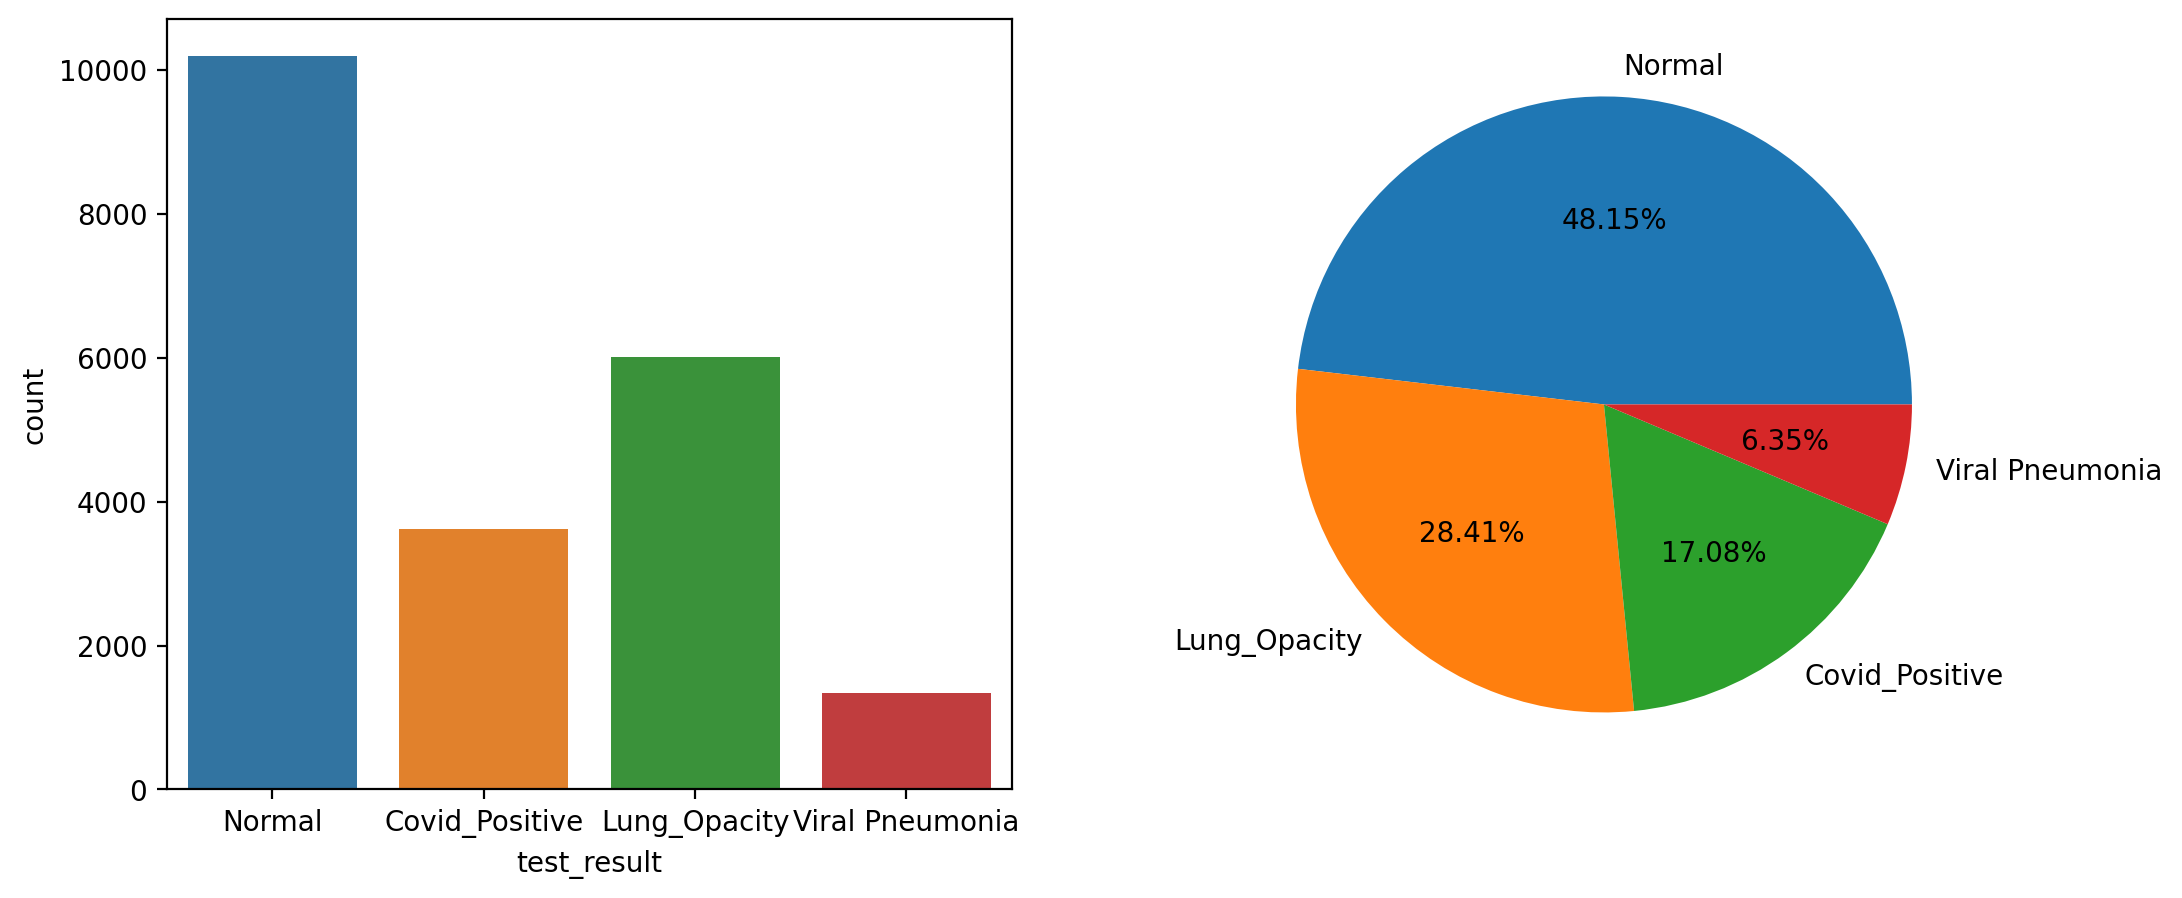

In [13]:
plt.figure(figsize=(12,5),dpi=200)
plt.subplot(1,2,1)
sns.countplot(data["test_result"])

plt.subplot(1,2,2)
plt.pie(results.values, labels = results.index, autopct = '%1.2f%%')
plt.show()

## ==========================================================================
## Report on the images in the dataset
The data set contains:
 - 48.15% of normal x-ray images
 - 28.41% of Lung opacity x-ray images
 - 17.08% of Covid positive x-ray images
 - 6.35% of viral pneumonia x-ray images

## ==========================================================================

## Visualizing the first 5 images from each category of x-ray images

In [14]:
path = "covid/COVID-19_Radiography_Dataset/Normal/images"
normal_path = os.listdir(path)
normal_images = [os.path.join(path, image) for image in normal_path]
normal_images[:5]

['covid/COVID-19_Radiography_Dataset/Normal/images\\Normal-1.png',
 'covid/COVID-19_Radiography_Dataset/Normal/images\\Normal-10.png',
 'covid/COVID-19_Radiography_Dataset/Normal/images\\Normal-100.png',
 'covid/COVID-19_Radiography_Dataset/Normal/images\\Normal-1000.png',
 'covid/COVID-19_Radiography_Dataset/Normal/images\\Normal-10000.png']

In [15]:
path = "covid/COVID-19_Radiography_Dataset/COVID/images"
covid_path = os.listdir(path)
covid_images = [os.path.join(path, image) for image in covid_path]
covid_images[:5]

['covid/COVID-19_Radiography_Dataset/COVID/images\\COVID-1.png',
 'covid/COVID-19_Radiography_Dataset/COVID/images\\COVID-10.png',
 'covid/COVID-19_Radiography_Dataset/COVID/images\\COVID-100.png',
 'covid/COVID-19_Radiography_Dataset/COVID/images\\COVID-1000.png',
 'covid/COVID-19_Radiography_Dataset/COVID/images\\COVID-1001.png']

In [16]:
path = "covid/COVID-19_Radiography_Dataset/Lung_Opacity/images"
lung_path = os.listdir(path)
lung_images = [os.path.join(path, image) for image in lung_path]
lung_images[:5]

['covid/COVID-19_Radiography_Dataset/Lung_Opacity/images\\Lung_Opacity-1.png',
 'covid/COVID-19_Radiography_Dataset/Lung_Opacity/images\\Lung_Opacity-10.png',
 'covid/COVID-19_Radiography_Dataset/Lung_Opacity/images\\Lung_Opacity-100.png',
 'covid/COVID-19_Radiography_Dataset/Lung_Opacity/images\\Lung_Opacity-1000.png',
 'covid/COVID-19_Radiography_Dataset/Lung_Opacity/images\\Lung_Opacity-1001.png']

In [17]:
path = "covid/COVID-19_Radiography_Dataset/Viral Pneumonia/images"
viral_path = os.listdir(path)
viral_images = [os.path.join(path, image) for image in viral_path]
viral_images[:5]

['covid/COVID-19_Radiography_Dataset/Viral Pneumonia/images\\Viral Pneumonia-1.png',
 'covid/COVID-19_Radiography_Dataset/Viral Pneumonia/images\\Viral Pneumonia-10.png',
 'covid/COVID-19_Radiography_Dataset/Viral Pneumonia/images\\Viral Pneumonia-100.png',
 'covid/COVID-19_Radiography_Dataset/Viral Pneumonia/images\\Viral Pneumonia-1000.png',
 'covid/COVID-19_Radiography_Dataset/Viral Pneumonia/images\\Viral Pneumonia-1001.png']

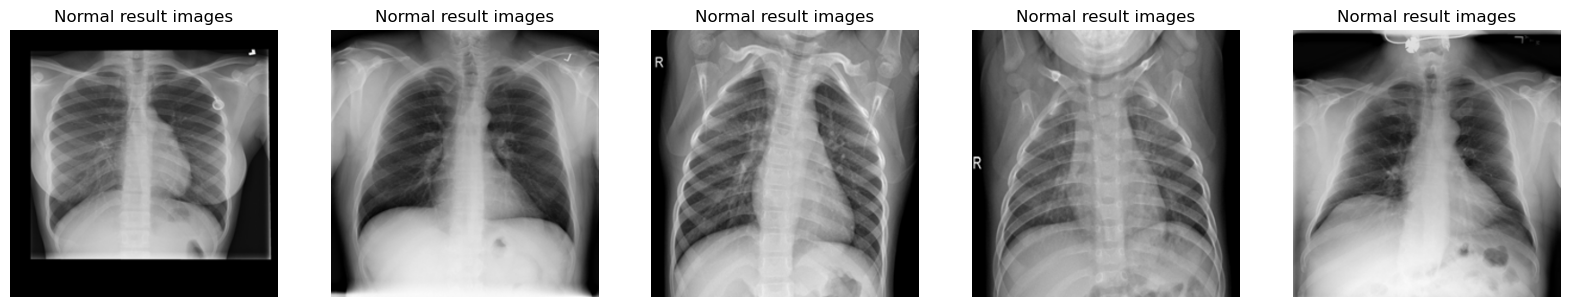

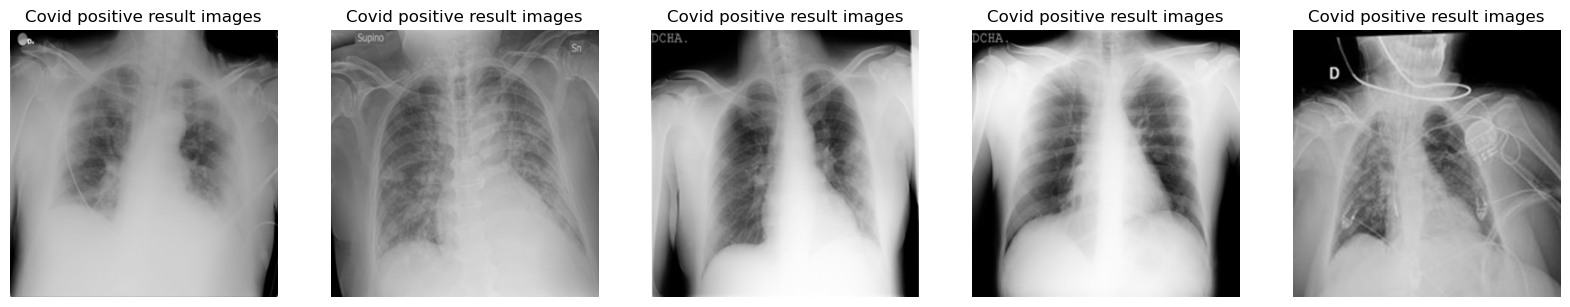

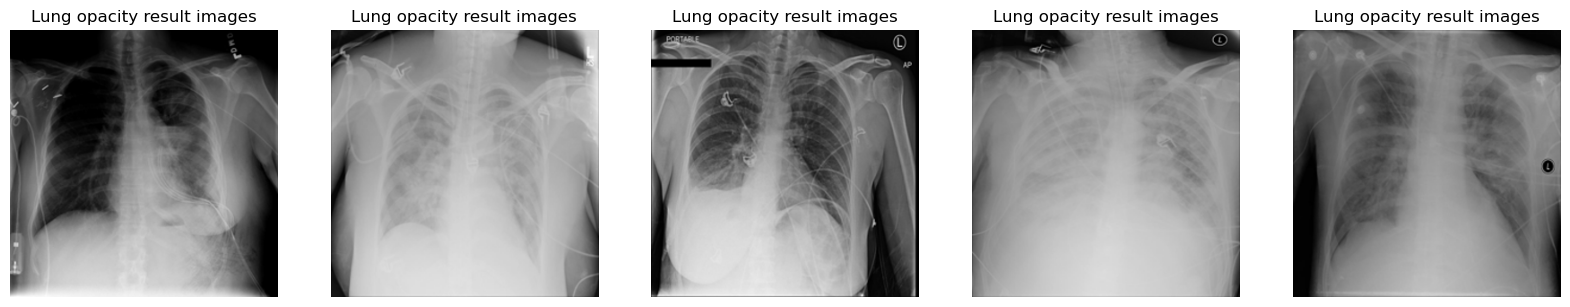

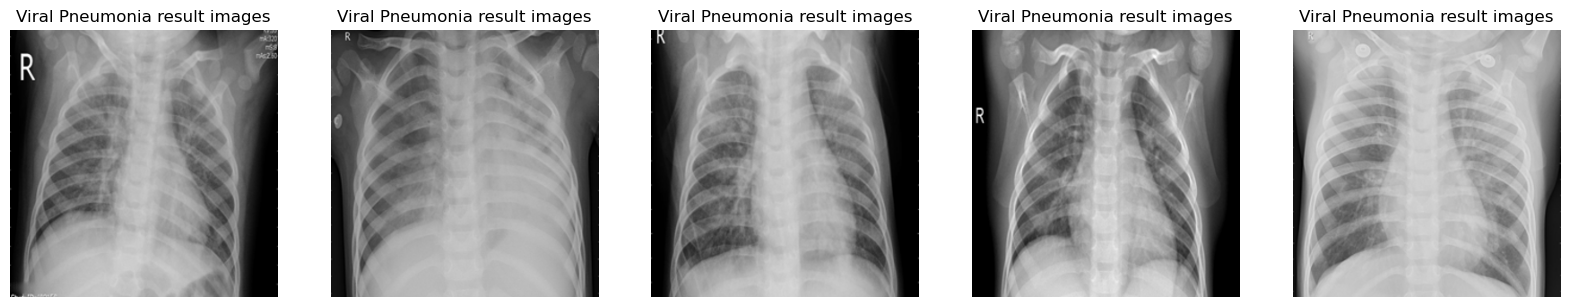

In [18]:
plt.figure(figsize = (20,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    image1 = cv2.imread(normal_images[i])
    plt.imshow(image1)
    plt.title("Normal result images")
    plt.axis('off')

plt.figure(figsize = (20,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    image2 = cv2.imread(covid_images[i])
    plt.imshow(image2)
    plt.title("Covid positive result images")
    plt.axis('off')
    
plt.figure(figsize = (20,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    image1 = cv2.imread(lung_images[i])
    plt.imshow(image1)
    plt.title("Lung opacity result images")
    plt.axis('off')

plt.figure(figsize = (20,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    image2 = cv2.imread(viral_images[i])
    plt.imshow(image2)
    plt.title("Viral Pneumonia result images")
    plt.axis('off')

## ============================================================================

## Comparing the original and transformed images using B channel and BEN GRAHAM's method

In [19]:
def random_analysis(image_path):
    
    image = cv2.imread(image_path)
    plt.figure(figsize=(10, 7))

    plt.subplot(1,3, 1)
    plt.title('Original ', fontsize = 14)
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1,3, 2)
    plt.title('B channel', fontsize = 14)
    plt.imshow(image[ : , : , 0])
    plt.axis('off');

    plt.subplot(1,3, 3) 
    img = cv2.imread(image_path)
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    plt.title("Ben Graham's Method", fontsize = 14)
    plt.imshow(img)
    plt.axis('off')


In [20]:
normal = os.listdir('covid/COVID-19_Radiography_Dataset/Normal/images/')[0]
covid = os.listdir('covid/COVID-19_Radiography_Dataset/COVID/images/')[0]
lung = os.listdir('covid/COVID-19_Radiography_Dataset/Lung_Opacity/images/')[0]
viral = os.listdir('covid/COVID-19_Radiography_Dataset/Viral Pneumonia/images/')[0]
print("Name of first x-ray image in each category: \n",)
print("Normal          : ",normal)
print("Covid Positive  : ",covid)
print("Lung Opacity    : ",lung)
print("Viral Pneumonia : ",viral)

Name of first x-ray image in each category: 

Normal          :  Normal-1.png
Covid Positive  :  COVID-1.png
Lung Opacity    :  Lung_Opacity-1.png
Viral Pneumonia :  Viral Pneumonia-1.png



=============================================Normal X-ray===============================================


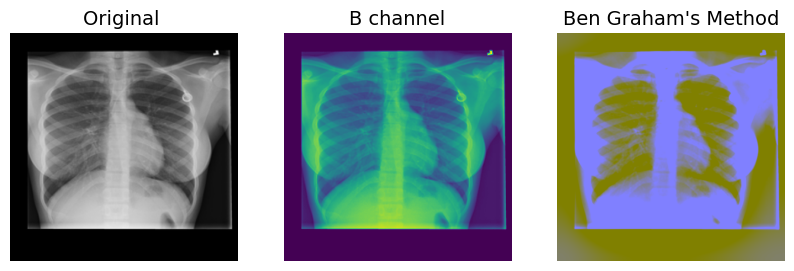

In [21]:
print("\n=============================================Normal X-ray===============================================")
random_analysis('covid/COVID-19_Radiography_Dataset/Normal/images\\Normal-1.png')


=============================================Covid Positive X-ray===============================================


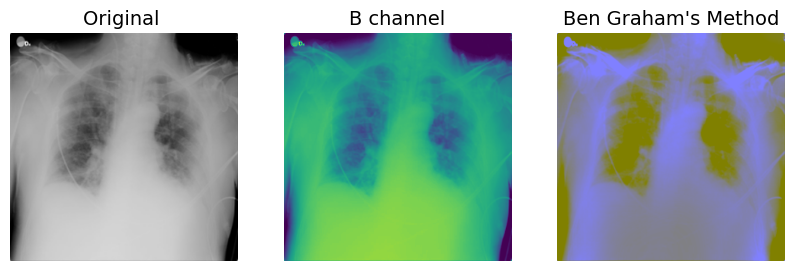

In [22]:
print("\n=============================================Covid Positive X-ray===============================================")
random_analysis( 'covid/COVID-19_Radiography_Dataset/COVID/images\\COVID-1.png')


=============================================Lung Opacity X-ray===============================================


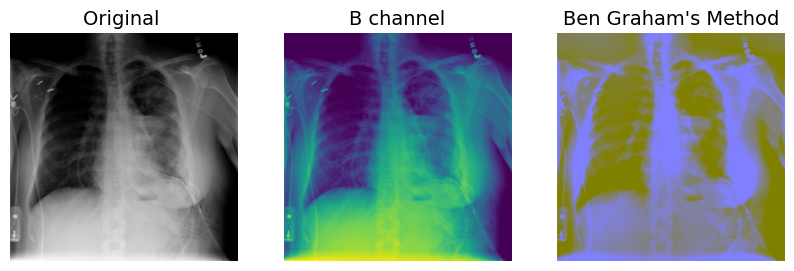

In [23]:
print("\n=============================================Lung Opacity X-ray===============================================")
random_analysis( 'covid/COVID-19_Radiography_Dataset/Lung_Opacity/images\\Lung_Opacity-1.png')


=============================================Viral Pneumonia X-ray===============================================


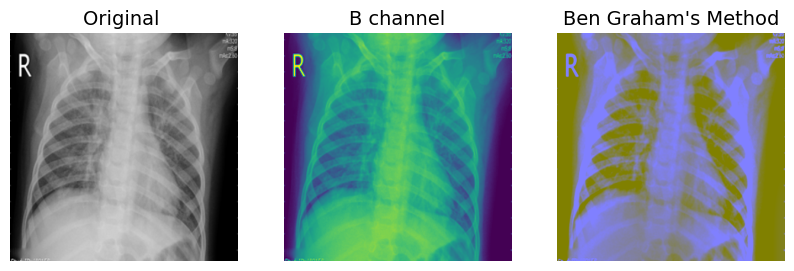

In [24]:
print("\n=============================================Viral Pneumonia X-ray===============================================")
random_analysis( 'covid/COVID-19_Radiography_Dataset/Viral Pneumonia/images\\Viral Pneumonia-1.png')

In [25]:
data['image'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((75,75))))

In [26]:
samples = data.image.count()
samples

21165

## ============================================================================
## Plotting Max value, Min value, Mean value distribution and Mean vs standard deviation of images

In [27]:
mean = []
std_dev = []
maximum = []
minimum = []

for i in range(0, samples):
    x= data['image'][i]
    mean.append(x.mean())
    std_dev.append(np.std(x))
    maximum.append(x.max())
    minimum.append(x.min())

image= data.loc[:,['image','test_result','path']]
image['mean'] = mean
image['std_dev'] = std_dev
image['max'] = maximum
image['min'] = minimum

image['subt_mean'] = image['mean'].mean() - image['mean']

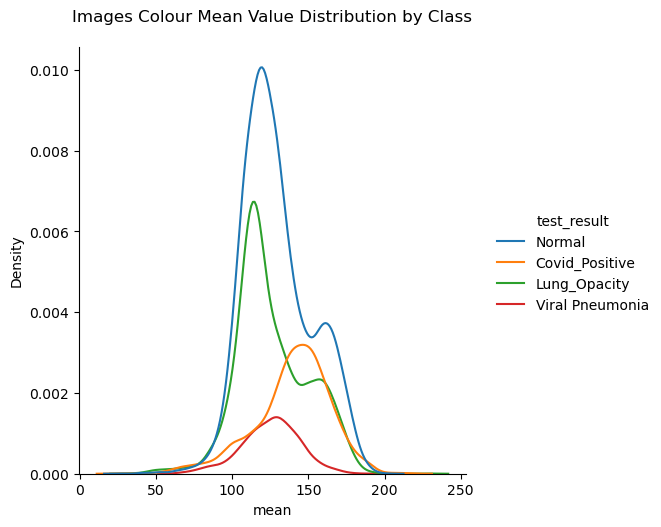

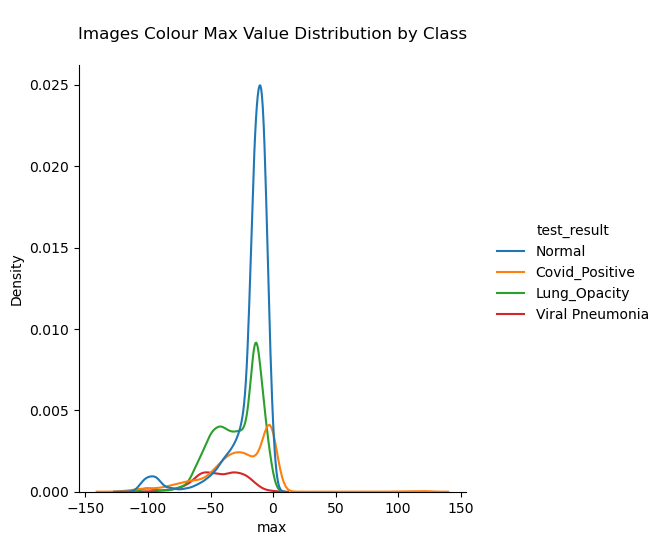

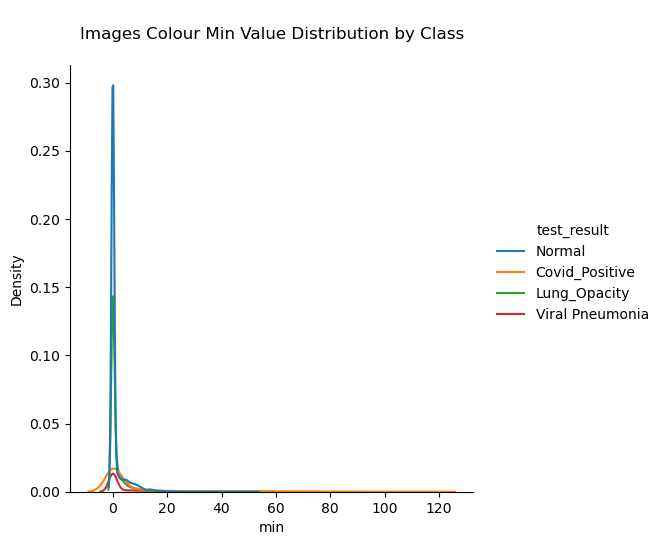

In [28]:
sns.displot(data = image, x = 'mean', kind="kde", hue = 'test_result');
plt.title('Images Colour Mean Value Distribution by Class\n');

sns.displot(data = image, x = 'max', kind="kde", hue = 'test_result');
plt.title('\nImages Colour Max Value Distribution by Class\n');

sns.displot(data = image, x = 'min', kind="kde", hue = 'test_result');
plt.title('\nImages Colour Min Value Distribution by Class\n');

<AxesSubplot:xlabel='mean', ylabel='std_dev'>

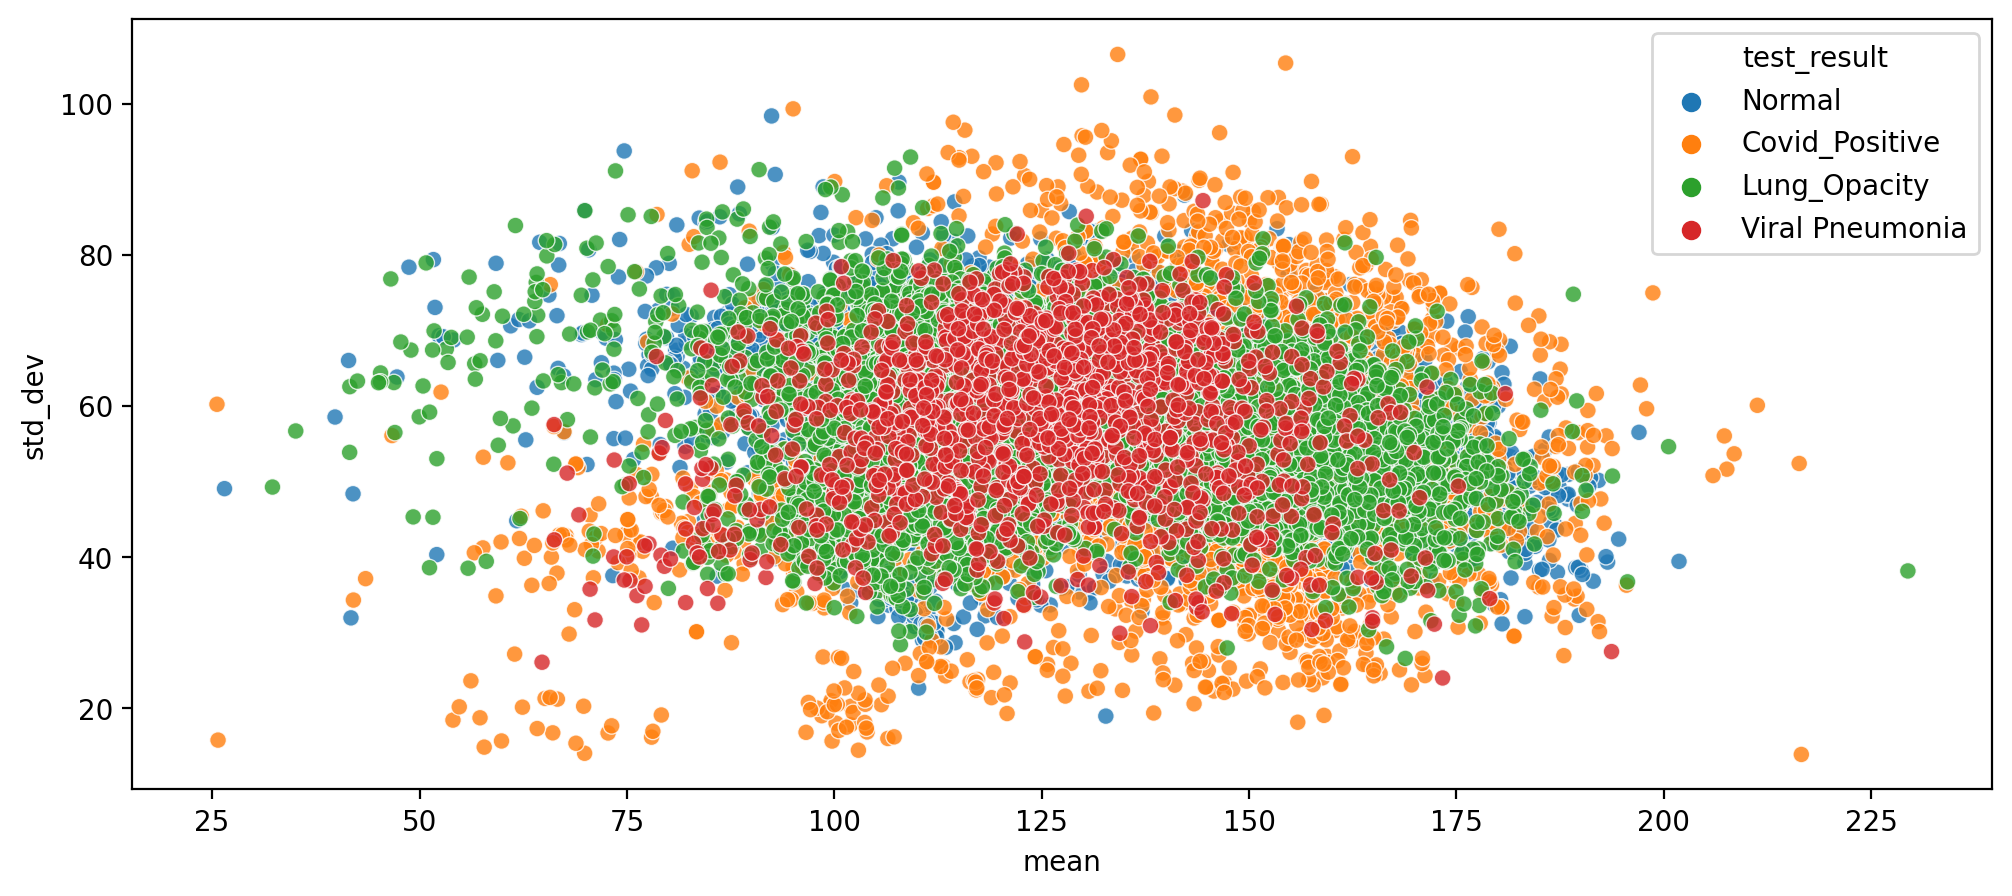

In [29]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data = image, x = "mean", y = 'std_dev', hue = 'test_result', alpha = 0.8)

## =============================================================================
## Converting all the categorical labels into numerical values for training and testing

In [30]:
new_data = []

for i in range(len(data)):
    image = cv2.imread(data['path'][i])
    image = cv2.resize(image, (70, 70)) / 255.0
    
    if data['test_result'][i] == "Normal":
        label = 0
    elif data['test_result'][i] =="Covid_Positive":
        label = 1
    elif data['test_result'][i] =="Lung_Opacity":
        label = 2
    else:
        label = 3
    
    new_data.append([image, label])

## ============================================================================
## Storing the images and labels in x and y arrays for training and testing

In [31]:
x = []
y = []

for image, label in new_data:
    x.append(image)
    y.append(label)

# Converting the list of images and labels to Numpy Array    
x = np.array(x)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

In [32]:
print("Shape of training data set   : ",x_train.shape)
print("Shape of testing data set    : ",x_test.shape)
print("Shape of validation data set : ",x_val.shape)
print("Shape of training label set  : ", y_train.shape)
print("Shape of testing label set   : ", y_test.shape)
print("Shape of validation labelset : ", y_val.shape)

Shape of training data set   :  (15238, 70, 70, 3)
Shape of testing data set    :  (4233, 70, 70, 3)
Shape of validation data set :  (1694, 70, 70, 3)
Shape of training label set  :  (15238,)
Shape of testing label set   :  (4233,)
Shape of validation labelset :  (1694,)


## ===========================================================================
## Creating the architecture

In [33]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (70, 70, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.3))

cnn_model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.5))

cnn_model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(units = 16, activation = 'relu'))
cnn_model.add(layers.Dropout(0.2))

cnn_model.add(layers.Dense(units = 4))


## ============================================================================
## Compiling the model

In [34]:
cnn_model.compile(optimizer = 'adam', 
           loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
           metrics = ['accuracy'])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 34, 34, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 34, 34, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

## ==============================================================================
## Fitting the model

In [35]:
call = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)
history = cnn_model.fit(x_train, y_train, 
                        epochs = 40, batch_size = 256,  
                        validation_data = (x_val, y_val), 
                        callbacks = [call])


Epoch 1/40
60/60 [==============================] - 148s 2s/step - loss: 1.1774 - accuracy: 0.4692 - val_loss: 1.0957 - val_accuracy: 0.5785
Epoch 2/40
60/60 [==============================] - 137s 2s/step - loss: 1.0382 - accuracy: 0.5688 - val_loss: 0.9465 - val_accuracy: 0.6122
Epoch 3/40
60/60 [==============================] - 142s 2s/step - loss: 0.9934 - accuracy: 0.5822 - val_loss: 0.8884 - val_accuracy: 0.6375
Epoch 4/40
60/60 [==============================] - 149s 2s/step - loss: 0.9371 - accuracy: 0.6043 - val_loss: 0.8572 - val_accuracy: 0.6446
Epoch 5/40
60/60 [==============================] - 142s 2s/step - loss: 0.9211 - accuracy: 0.6091 - val_loss: 0.8182 - val_accuracy: 0.6582
Epoch 6/40
60/60 [==============================] - 158s 3s/step - loss: 0.8930 - accuracy: 0.6176 - val_loss: 0.8327 - val_accuracy: 0.6511
Epoch 7/40
60/60 [==============================] - 167s 3s/step - loss: 0.8872 - accuracy: 0.6182 - val_loss: 0.7933 - val_accuracy: 0.6582
Epoch 8/40
60

## ===========================================================================
## Evaluating the model

In [36]:
yp_train = cnn_model.predict(x_train)
yp_train = np.argmax(yp_train, axis = 1)

yp_val = cnn_model.predict(x_val)
yp_val = np.argmax(yp_val, axis = 1)

yp_test = cnn_model.predict(x_test)
yp_test = np.argmax(yp_test, axis = 1)

133/133 [==============================] - 9s 68ms/step


In [37]:
def evaluation_parametrics(name, y_train, yp_train, y_val, yp_val, y_test, yp_test):
    
    print("\n-----------------------------{}-----------------------------\n".format(name))
    
    cm_train = confusion_matrix(y_train, yp_train)
    t1 = ConfusionMatrixDisplay(cm_train)
    
    print("Classification Report for Train Data\n")
    print(classification_report(y_train, yp_train)) 
    t1.plot()
    print("--------------------------------------------------------------------------")
       
    cm_val = confusion_matrix(y_val, yp_val)
    t2 = ConfusionMatrixDisplay(cm_val)
    
    print("\nClassification Report for Validation Data\n")
    print(classification_report(y_val, yp_val))   
    t2.plot()
    print("--------------------------------------------------------------------------")

    cm_test = confusion_matrix(y_test, yp_test)
    t3 = ConfusionMatrixDisplay(cm_test)

    
    print("\nClassification Report for Test Data\n")
    print(classification_report(y_test, yp_test))   
    t3.plot()
    print("--------------------------------------------------------------------------")
  


-----------------------------Convolution Neural Network-----------------------------

Classification Report for Train Data

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      7338
           1       0.90      0.89      0.90      2573
           2       0.95      0.77      0.85      4352
           3       0.99      0.95      0.97       975

    accuracy                           0.90     15238
   macro avg       0.93      0.89      0.91     15238
weighted avg       0.90      0.90      0.90     15238

--------------------------------------------------------------------------

Classification Report for Validation Data

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       798
           1       0.84      0.80      0.82       313
           2       0.92      0.75      0.83       475
           3       0.98      0.84      0.91       108

    accuracy                           0.86      

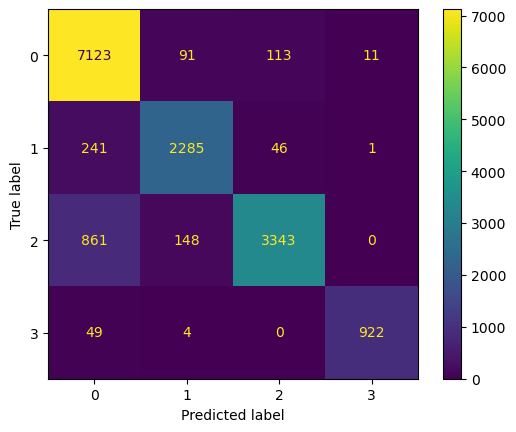

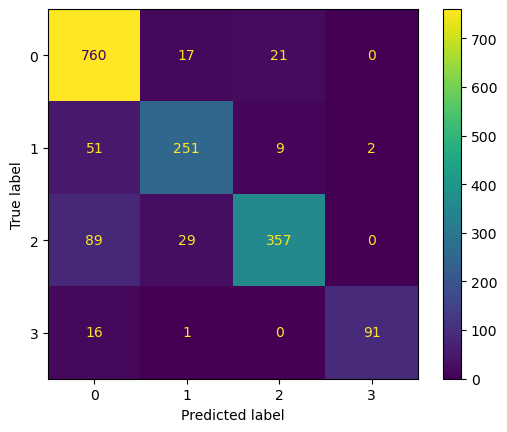

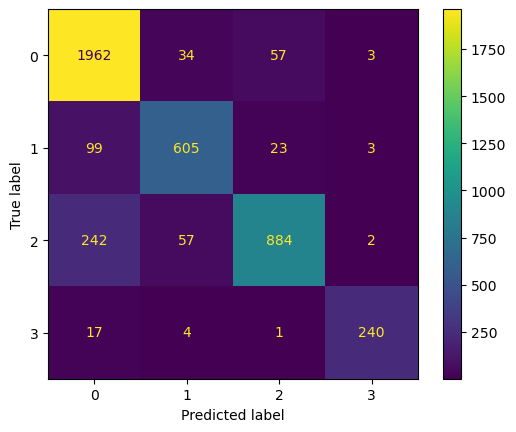

In [38]:
evaluation_parametrics("Convolution Neural Network", y_train, yp_train, y_val, yp_val, y_test, yp_test)

## =======================================================================
## Plotting the model accuracy and loss

In [39]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


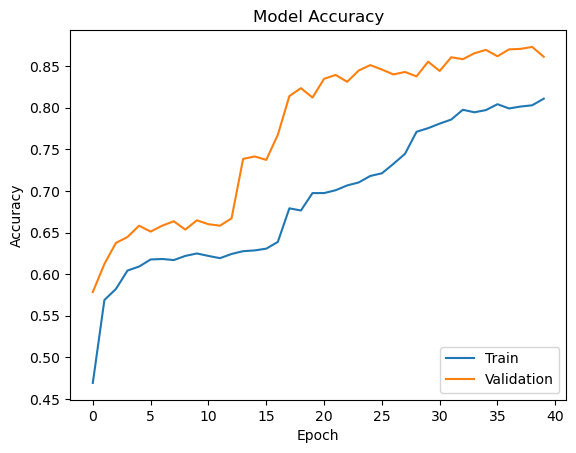

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()


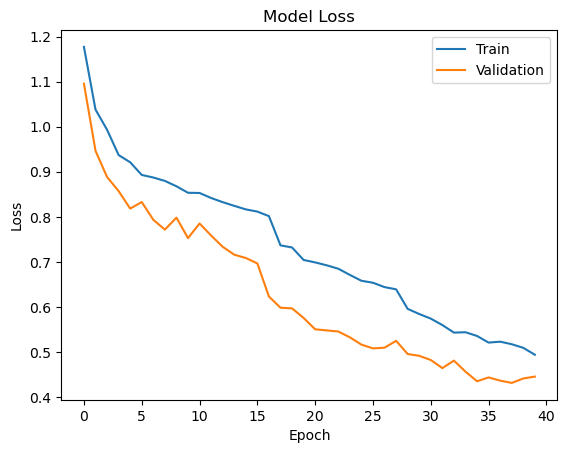

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

## =======================================================================
## Checking the predictions for random images from the dataset

In [42]:
data["test_result"][data["test_result"]=='Lung_Opacity'].head()

13808    Lung_Opacity
13809    Lung_Opacity
13810    Lung_Opacity
13811    Lung_Opacity
13812    Lung_Opacity
Name: test_result, dtype: object

In [43]:
data["test_result"][data["test_result"]=='Viral Pneumonia'].head()

19820    Viral Pneumonia
19821    Viral Pneumonia
19822    Viral Pneumonia
19823    Viral Pneumonia
19824    Viral Pneumonia
Name: test_result, dtype: object

In [50]:
img_path = data["path"][[12500,19824,7550,13810]]
img_path

12500    covid/COVID-19_Radiography_Dataset/COVID/image...
19824    covid/COVID-19_Radiography_Dataset/Viral Pneum...
7550     covid/COVID-19_Radiography_Dataset/Normal/imag...
13810    covid/COVID-19_Radiography_Dataset/Lung_Opacit...
Name: path, dtype: object

In [51]:
j=0
for i in img_path:
    z_img = cv2.imread(i)
    z_img = cv2.resize(z_img, (70, 70)) / 255.0
    z_img = z_img.reshape(1, z_img.shape[0], z_img.shape[1], z_img.shape[2])
    
    z = cnn_model.predict(z_img)
    z = np.argmax(z, axis = 1)
    if z[0] == 0:
        z = "Normal"
    elif z[0] == 1:
        z ="Covid Positive"
    elif z[0] == 2:
        z ="Lung Opacity"
    else:
        z = "Viral Pneumonia"
    j+=1
    print("Prediction for image {} in img_path : ".format(j), z)
    print("\n")

1/1 [==============================] - 0s 21ms/step
Prediction for image 1 in img_path :  Covid Positive


1/1 [==============================] - 0s 27ms/step
Prediction for image 2 in img_path :  Viral Pneumonia


1/1 [==============================] - 0s 25ms/step
Prediction for image 3 in img_path :  Normal


1/1 [==============================] - 0s 23ms/step
Prediction for image 4 in img_path :  Lung Opacity




## =======================================================================
## Report :
- From the random images collected from the dataset the model could accurately predict the results for all the images

## =======================================================================
## Checking the predictions for random images not included in the dataset

(168, 299, 3)
(680, 680, 3)


(-0.5, 679.5, 679.5, -0.5)

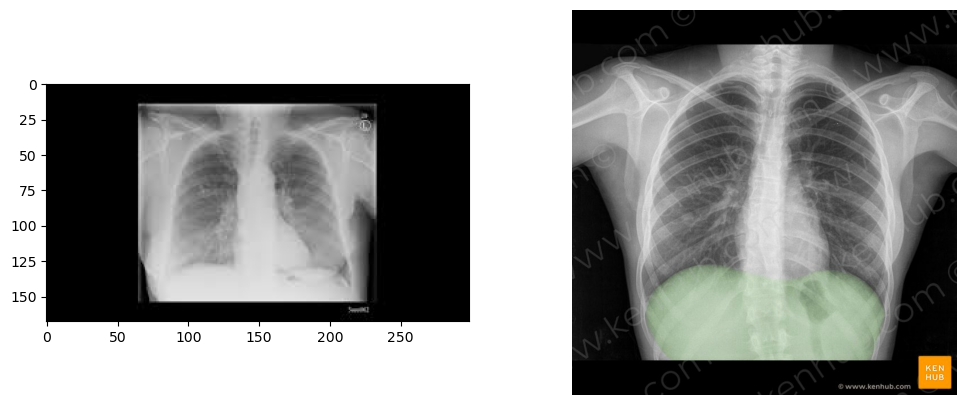

In [46]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
image_path = "covid/covid x-ray.jpeg"
image = cv2.imread(image_path)
print(image.shape)
plt.imshow(image)

plt.subplot(1,2,2)
image_path = "covid/normal x-ray.jpeg"
image = cv2.imread(image_path)
print(image.shape)
plt.imshow(image)
plt.axis("off")

In [47]:
def x_ray(image_path):
    z_img = cv2.imread(image_path)
    z_img = cv2.resize(z_img, (70,70)) / 255.0
    z_img = z_img.reshape(1, z_img.shape[0], z_img.shape[1], z_img.shape[2])
    
    z = cnn_model.predict(z_img)
    z = np.argmax(z, axis = 1)
    if z[0] == 0:
        z = "Normal"
    elif z[0] == 1:
        z ="Covid Positive"
    elif z[0] == 2:
        z ="Lung Opacity"
    else:
        z = "Viral Pneumonia"

    print("Prediction for x-ray image : ", z)

In [48]:
x_ray("covid/covid x-ray.jpeg")

1/1 [==============================] - 0s 21ms/step
Prediction for x-ray image :  Covid Positive


In [49]:
x_ray("covid/normal x-ray.jpeg")

1/1 [==============================] - 0s 21ms/step
Prediction for x-ray image :  Normal


## ==========================================================================
## Report :
- From the images randomly collected from the google, the model could accurately predict the results for all the images

## ==========================================================================
## Conclusion

- Using various techniques done exploratory image analysis on covid positive,normal,lung opacity and viral pneumomia x-ray images.
- Here we used Convolutional Neural Network Model and got a very good Accuracy and Loss from the model and there was no overfitting or underfitting issues.
- For the images randomly taken from other sources also our model could accurately predict the result
- The entire process proves that Deep learning algorithms can be a valuable tool for the classification of COVID-19 using X-ray images and it can truely help in diagnosising the disease and its treatment.